In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv('mushrooms.csv')
df

class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0        p         x           s         n       t    p               f   
1        e         x           s         y       t    a               f   
2        e         b           s         w       t    l               f   
3        p         x           y         w       t    p               f   
4        e         x           s         g       f    n               f   
...    ...       ...         ...       ...     ...  ...             ...   
8119     e         k           s         n       f    n               a   
8120     e         x           s         n       f    n               a   
8121     e         f           s         n       f    n               a   
8122     p         k           y         n       f    y               f   
8123     e         x           s         n       f    n               a   

     gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0               c         n          k  ...                        s   
1               c         b          k  ...                        s   
2               c         b          n  ...                        s   
3               c         n          n  ...                        s   
4               w         b          k  ...                        s   
...           ...       ...        ...  ...                      ...   
8119            c         b          y  ...                        s   
8120            c         b          y  ...                        s   
8121            c         b          n  ...                        s   
8122            c         n          b  ...                        k   
8123            c         b          y  ...                        s   

     stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                         w                      w         p          w   
1                         w                      w         p          w   
2                         w                      w         p          w   
3                         w                      w         p          w   
4                         w                      w         p          w   
...                     ...                    ...       ...        ...   
8119                      o                      o         p          o   
8120                      o                      o         p          n   
8121                      o                      o         p          o   
8122                      w                      w         p          w   
8123                      o                      o         p          o   

     ring-number ring-type spore-print-color population habitat  
0              o         p                 k          s       u  
1              o         p                 n          n       g  
2              o         p                 n          n       m  
3              o         p                 k          s       u  
4              o         e                 n          a       g  
...          ...       ...               ...        ...     ...  
8119           o         p                 b          c       l  
8120           o         p                 b          v       l  
8121           o         p                 b          c       l  
8122           o         e                 w          v       l  
8123           o         p                 o          c       l  

[8124 rows x 23 columns]

In [3]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [4]:
df.shape

(8124, 23)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
df.describe()

class cap-shape cap-surface cap-color bruises  odor gill-attachment  \
count   8124      8124        8124      8124    8124  8124            8124   
unique     2         6           4        10       2     9               2   
top        e         x           y         n       f     n               f   
freq    4208      3656        3244      2284    4748  3528            7914   

       gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
count          8124      8124       8124  ...                     8124   
unique            2         2         12  ...                        4   
top               c         b          b  ...                        s   
freq           6812      5612       1728  ...                     4936   

       stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
count                    8124                   8124      8124       8124   
unique                      9                      9         1          4   
top                         w                      w         p          w   
freq                     4464                   4384      8124       7924   

       ring-number ring-type spore-print-color population habitat  
count         8124      8124              8124       8124    8124  
unique           3         5                 9          6       7  
top              o         p                 w          v       d  
freq          7488      3968              2388       4040    3148  

[4 rows x 23 columns]

In [7]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

#no null values in he data set

In [8]:
df.loc[df.duplicated()].shape

(0, 23)

<Figure size 432x288 with 0 Axes>

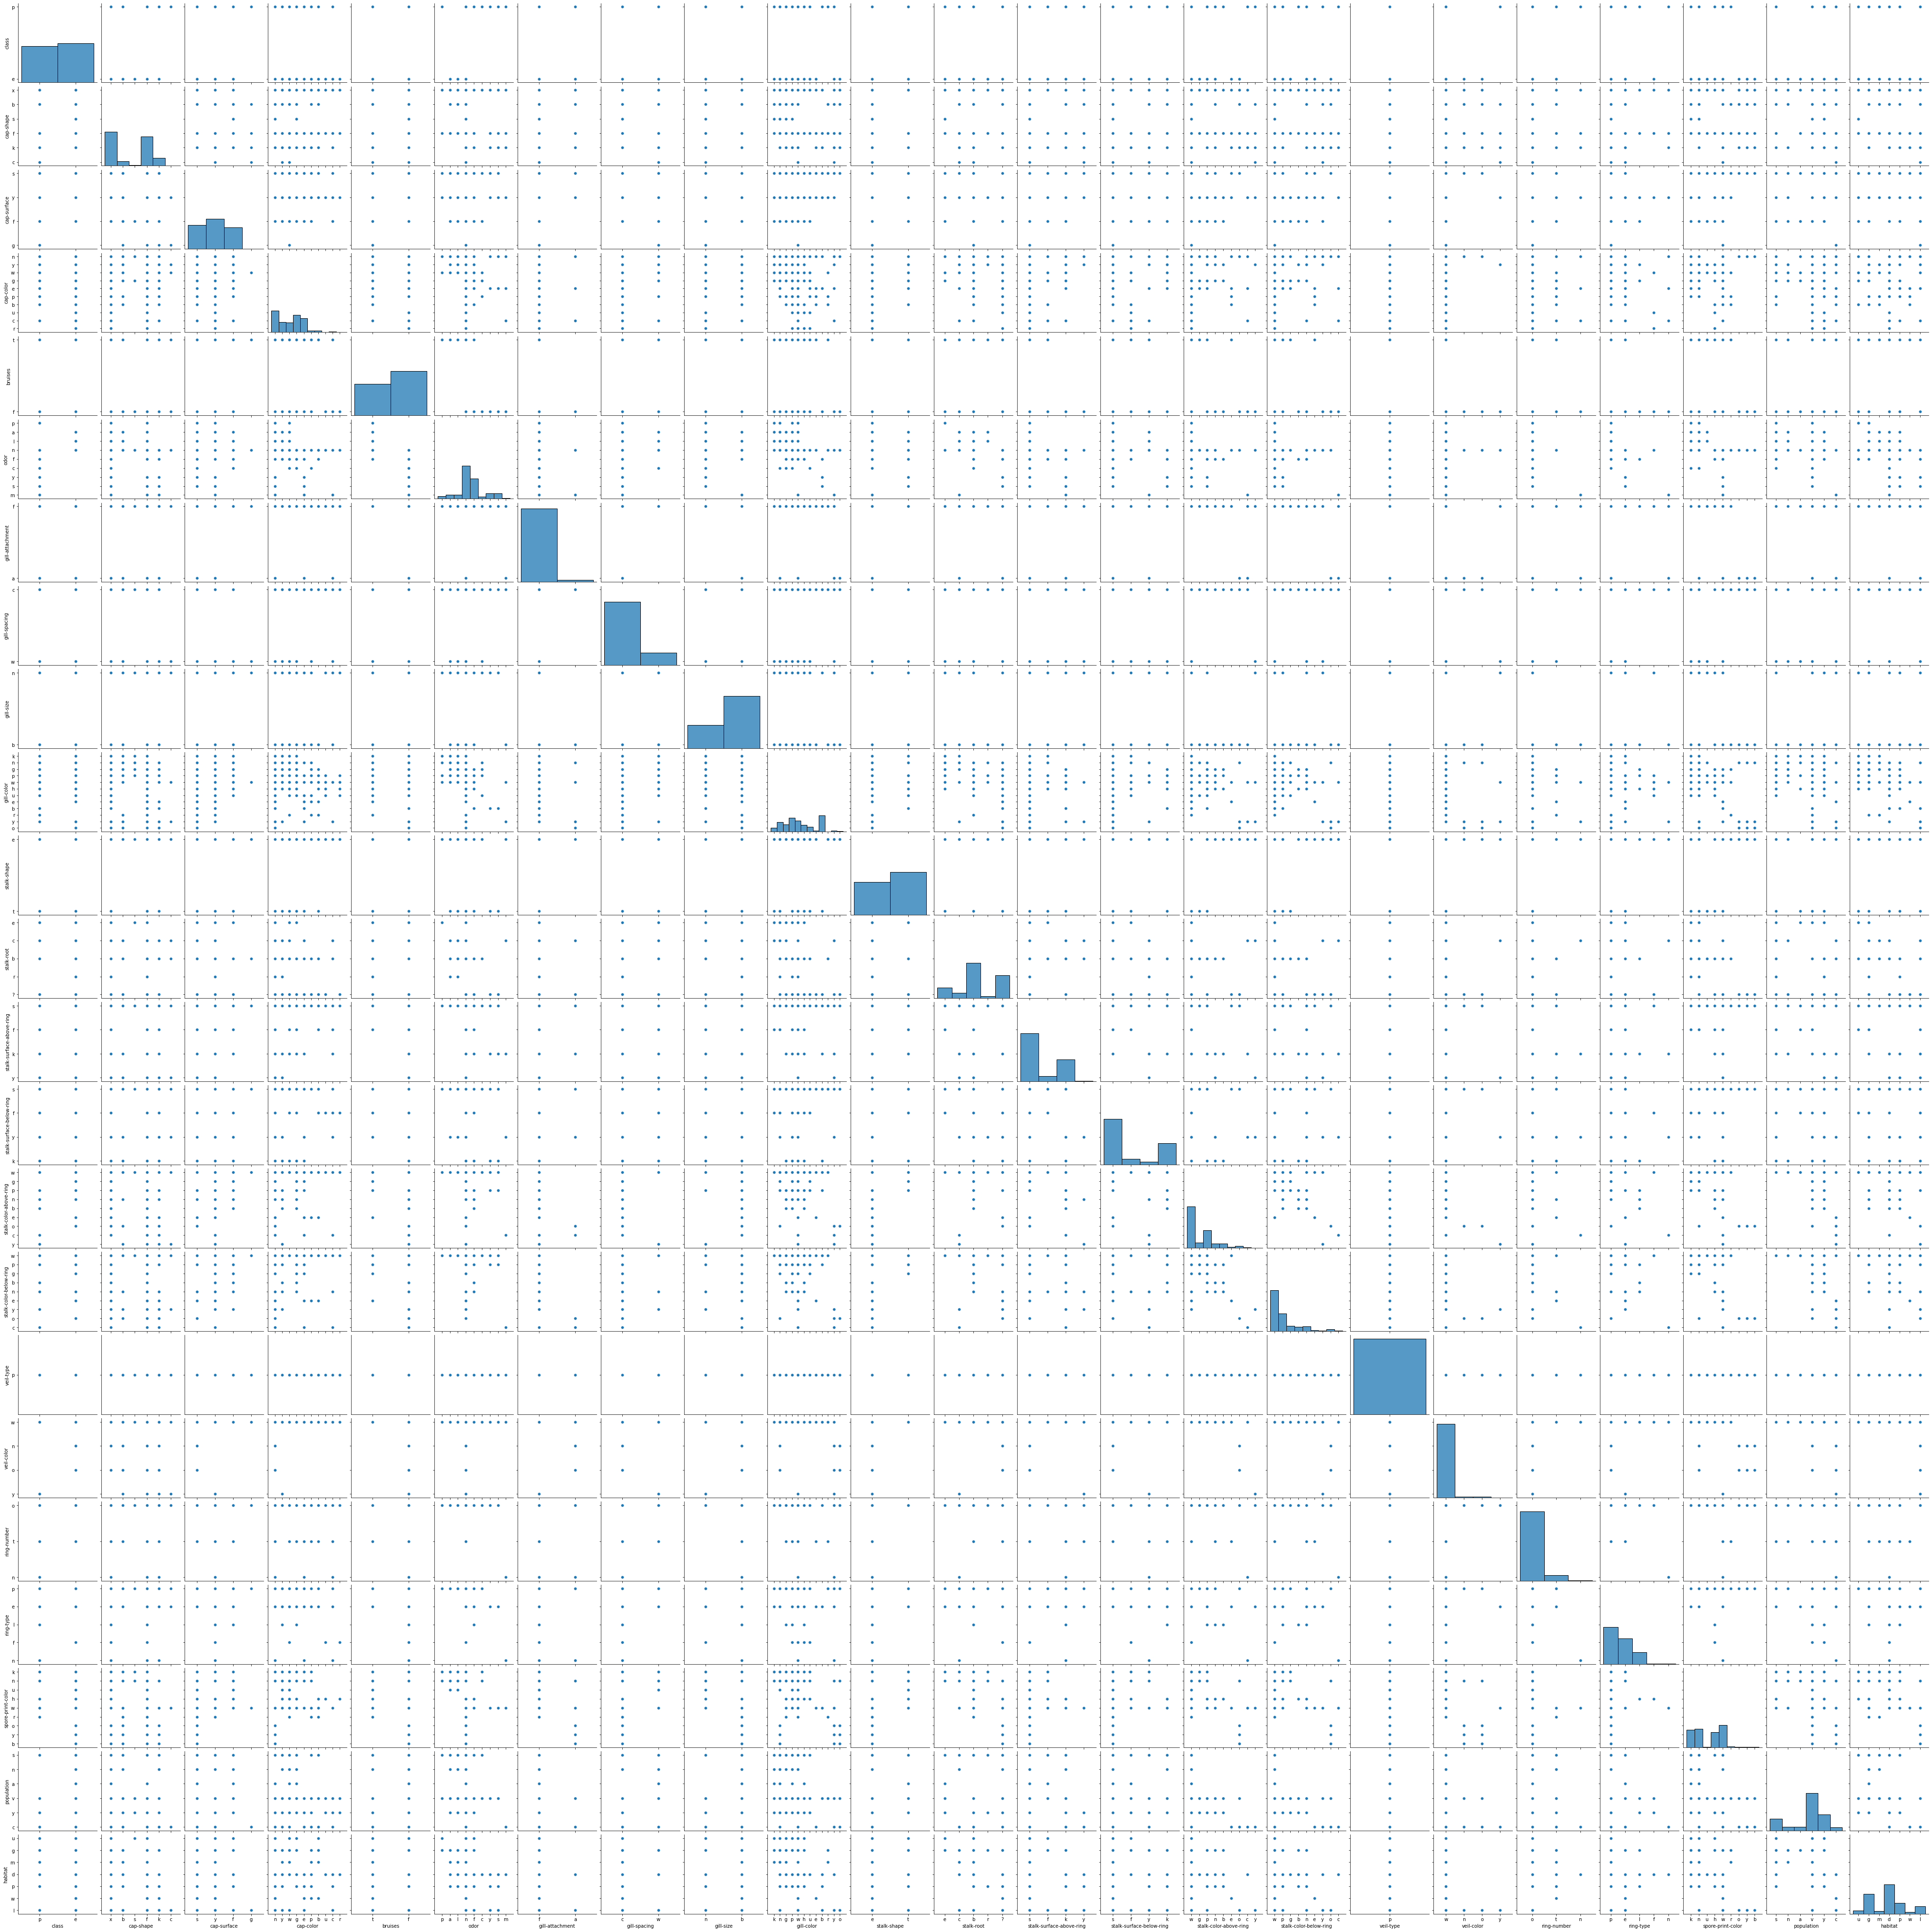

In [9]:
plt.figure()
sns.pairplot(df, vars=['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor','gill-attachment', 'gill-spacing', 'gill-size', 'gill-color','stalk-shape', 'stalk-root', 'stalk-surface-above-ring','stalk-surface-below-ring', 'stalk-color-above-ring','stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number','ring-type', 'spore-print-color', 'population', 'habitat'], hue = None)
plt.show()

In [10]:
M_cols = df.columns.to_list()
print("Value Distribution:\n")
for col in M_cols:
    print(col,"\n",df[col].value_counts(),"\n\n")

Value Distribution:

class 
 e    4208
p    3916
Name: class, dtype: int64 


cap-shape 
 x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64 


cap-surface 
 y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64 


cap-color 
 n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64 


bruises 
 f    4748
t    3376
Name: bruises, dtype: int64 


odor 
 n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64 


gill-attachment 
 f    7914
a     210
Name: gill-attachment, dtype: int64 


gill-spacing 
 c    6812
w    1312
Name: gill-spacing, dtype: int64 


gill-size 
 b    5612
n    2512
Name: gill-size, dtype: int64 


gill-color 
 b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int64 


stalk-shape 
 t  

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


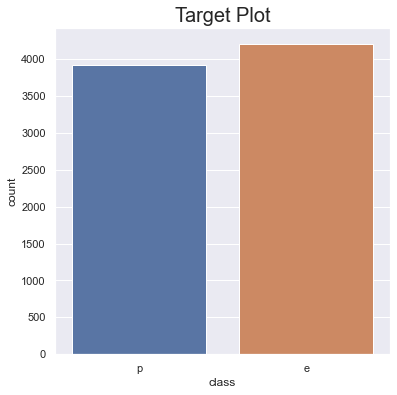

In [11]:
total = float(len(df[M_cols[0]]))
plt.figure(figsize=(6,6))
sns.set(style="darkgrid")
ax = sns.countplot(df[M_cols[0]])
plt.title("Target Plot", fontsize = 20)
plt.show()

In [12]:
df['class'].describe()

count     8124
unique       2
top          e
freq      4208
Name: class, dtype: object

<AxesSubplot:>

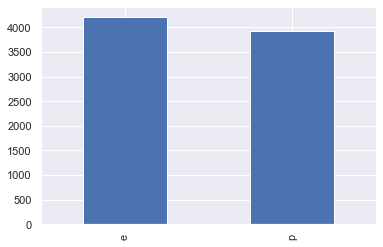

In [13]:
df['class'].value_counts().plot.bar()

# Unvariate plots

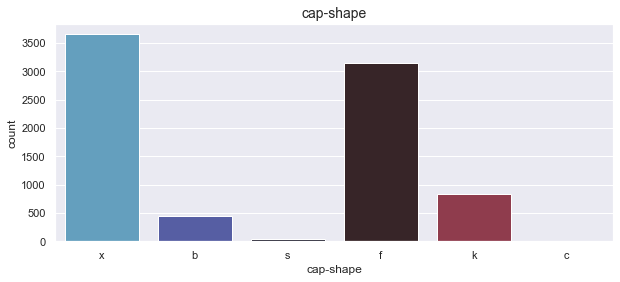

% of total:
x    45.00
f    38.80
k    10.19
b     5.56
s     0.39
c     0.05
Name: cap-shape, dtype: float64


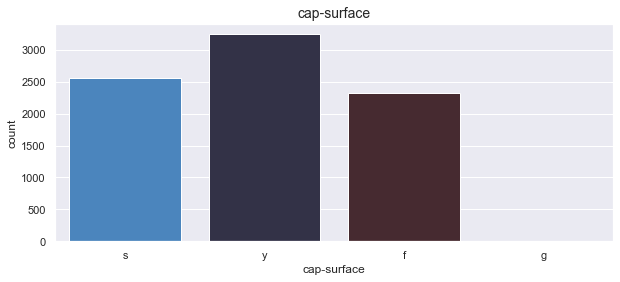

% of total:
y    39.93
s    31.46
f    28.56
g     0.05
Name: cap-surface, dtype: float64


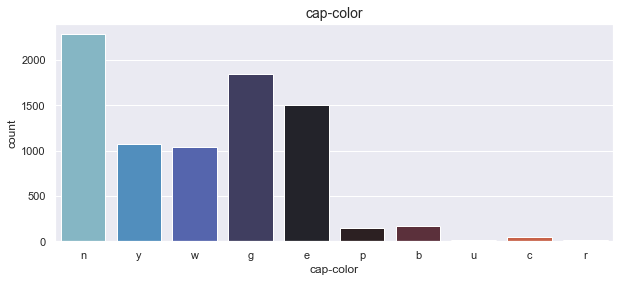

% of total:
n    28.11
g    22.65
e    18.46
y    13.20
w    12.80
b     2.07
p     1.77
c     0.54
u     0.20
r     0.20
Name: cap-color, dtype: float64


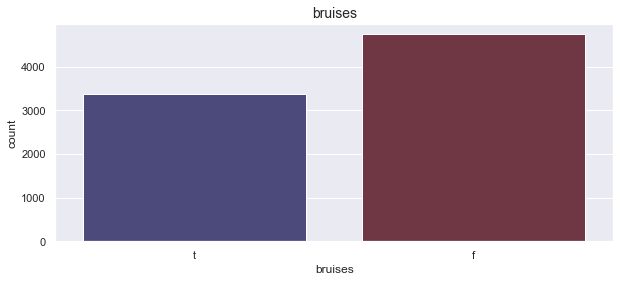

% of total:
f    58.44
t    41.56
Name: bruises, dtype: float64


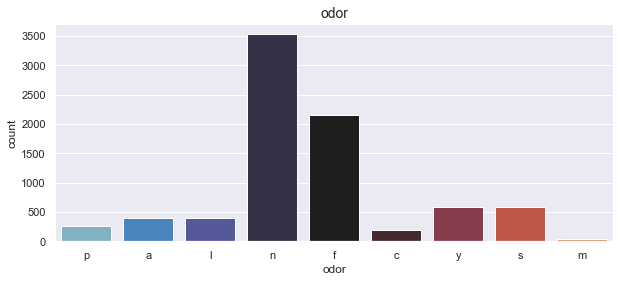

% of total:
n    43.43
f    26.59
y     7.09
s     7.09
a     4.92
l     4.92
p     3.15
c     2.36
m     0.44
Name: odor, dtype: float64


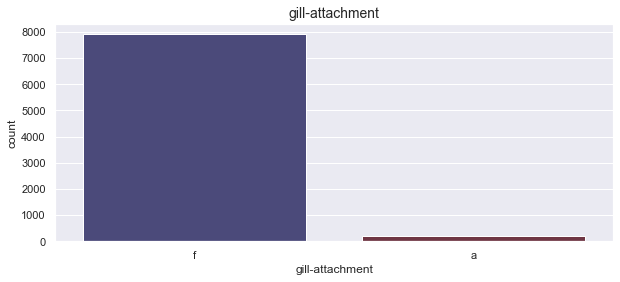

% of total:
f    97.42
a     2.58
Name: gill-attachment, dtype: float64


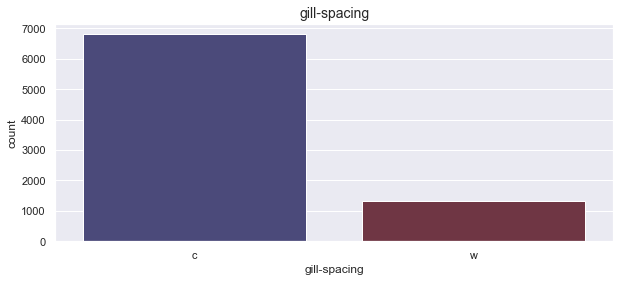

% of total:
c    83.85
w    16.15
Name: gill-spacing, dtype: float64


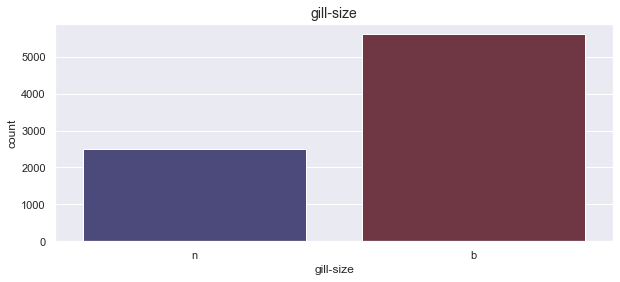

% of total:
b    69.08
n    30.92
Name: gill-size, dtype: float64


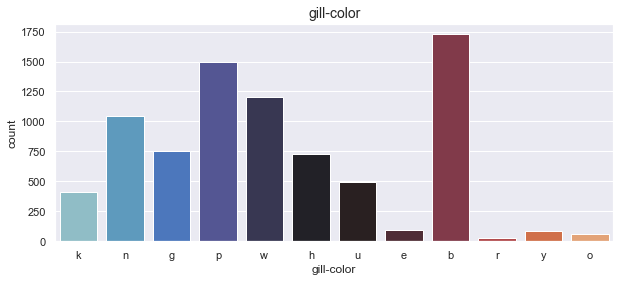

% of total:
b    21.27
p    18.37
w    14.80
n    12.90
g     9.26
h     9.01
u     6.06
k     5.02
e     1.18
y     1.06
o     0.79
r     0.30
Name: gill-color, dtype: float64


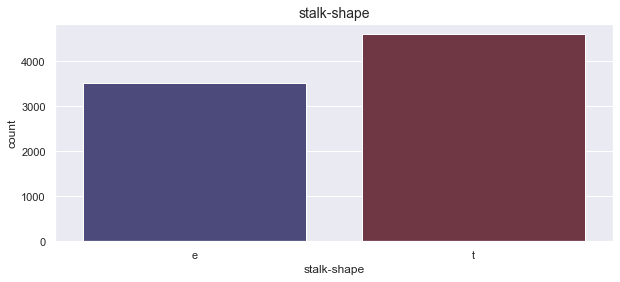

% of total:
t    56.72
e    43.28
Name: stalk-shape, dtype: float64


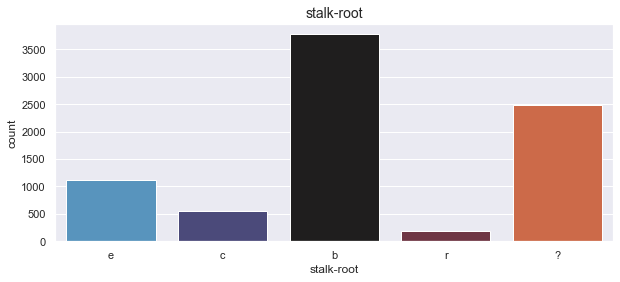

% of total:
b    46.48
?    30.53
e    13.79
c     6.84
r     2.36
Name: stalk-root, dtype: float64


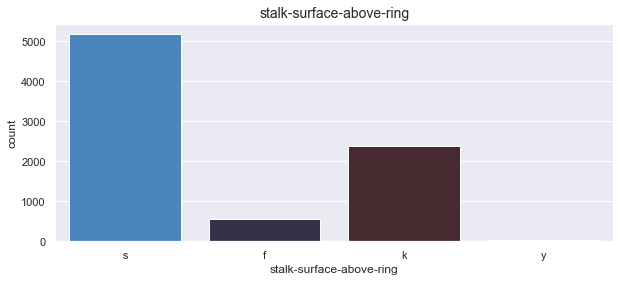

% of total:
s    63.71
k    29.20
f     6.79
y     0.30
Name: stalk-surface-above-ring, dtype: float64


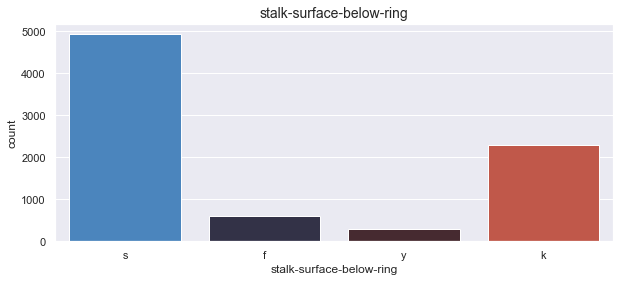

% of total:
s    60.76
k    28.36
f     7.39
y     3.50
Name: stalk-surface-below-ring, dtype: float64


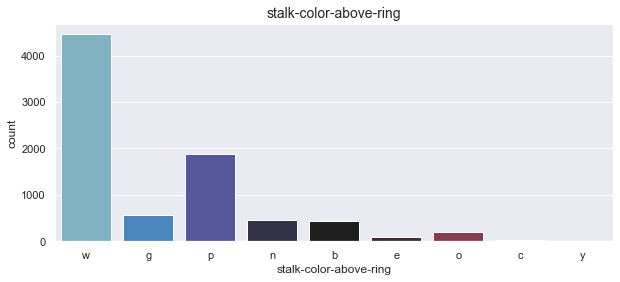

% of total:
w    54.95
p    23.04
g     7.09
n     5.51
b     5.32
o     2.36
e     1.18
c     0.44
y     0.10
Name: stalk-color-above-ring, dtype: float64


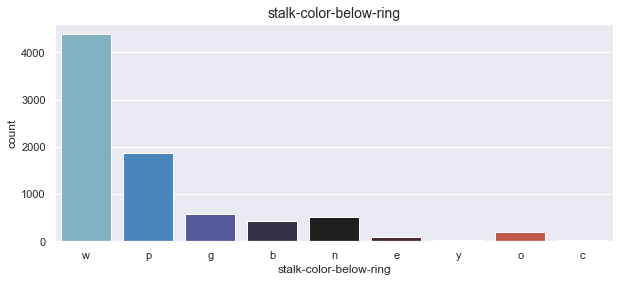

% of total:
w    53.96
p    23.04
g     7.09
n     6.30
b     5.32
o     2.36
e     1.18
c     0.44
y     0.30
Name: stalk-color-below-ring, dtype: float64


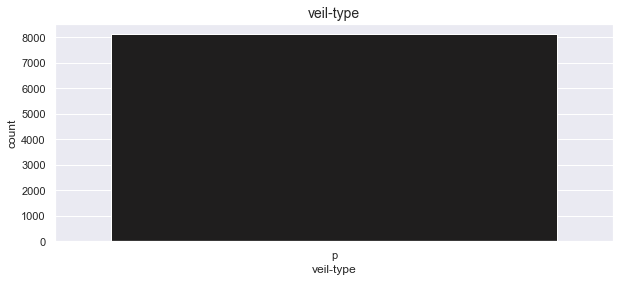

% of total:
p    100.0
Name: veil-type, dtype: float64


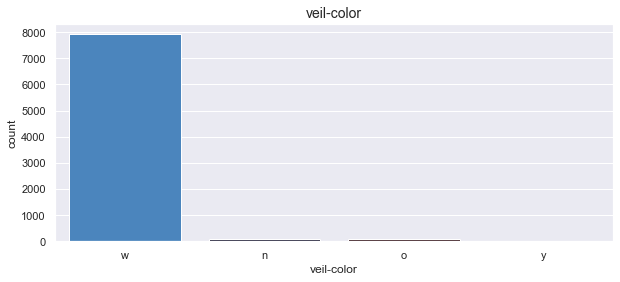

% of total:
w    97.54
n     1.18
o     1.18
y     0.10
Name: veil-color, dtype: float64


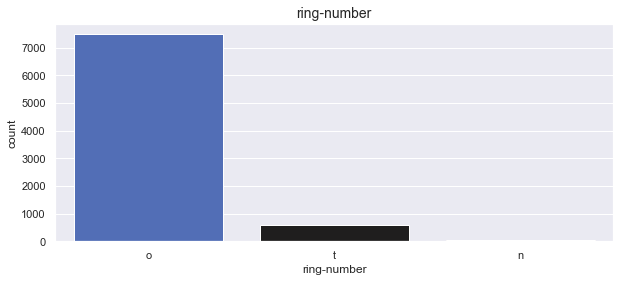

% of total:
o    92.17
t     7.39
n     0.44
Name: ring-number, dtype: float64


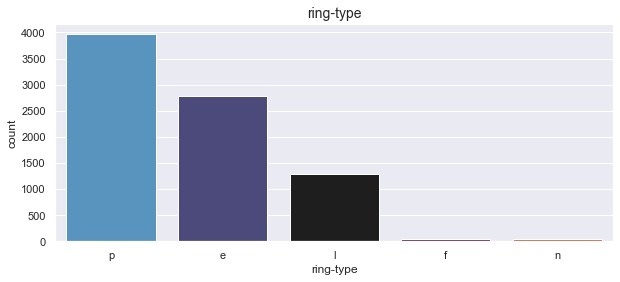

% of total:
p    48.84
e    34.17
l    15.95
f     0.59
n     0.44
Name: ring-type, dtype: float64


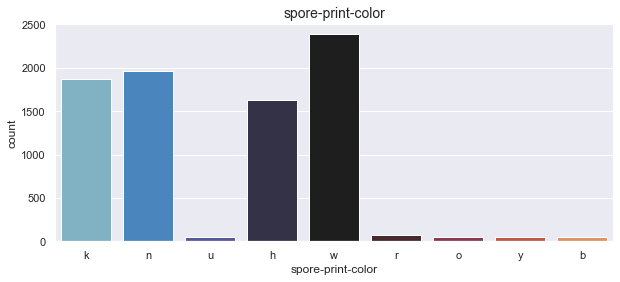

% of total:
w    29.39
n    24.22
k    23.04
h    20.09
r     0.89
u     0.59
o     0.59
y     0.59
b     0.59
Name: spore-print-color, dtype: float64


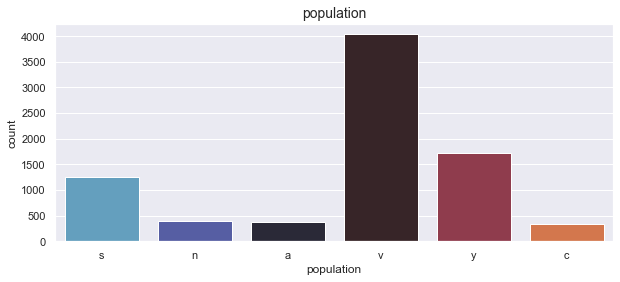

% of total:
v    49.73
y    21.07
s    15.36
n     4.92
a     4.73
c     4.19
Name: population, dtype: float64


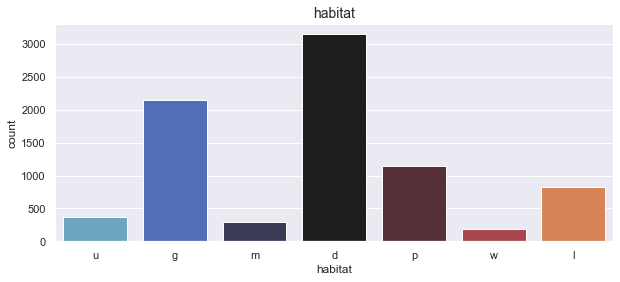

% of total:
d    38.75
g    26.44
p    14.08
l    10.24
u     4.53
m     3.59
w     2.36
Name: habitat, dtype: float64


In [14]:
for col in M_cols[1:]:
    plt.figure(figsize=(10,4))
    sns.countplot(x=col , data=df ,palette='icefire')
    plt.title(col, fontsize=14)
    plt.show()
    print("% of total:")
    print(round((df[col].value_counts()/df.shape[0]),4)*100)

# Multivariate plots

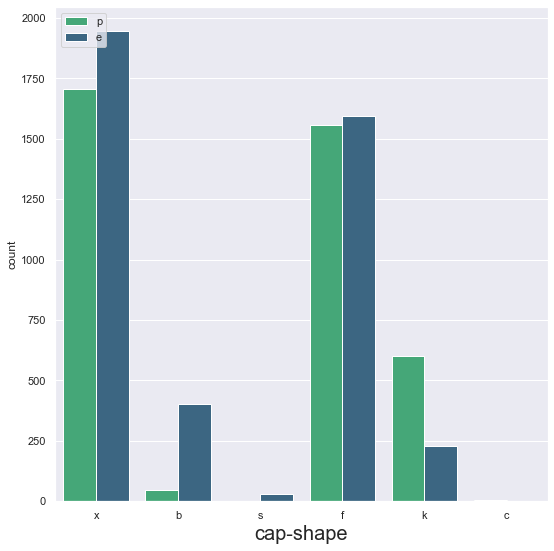

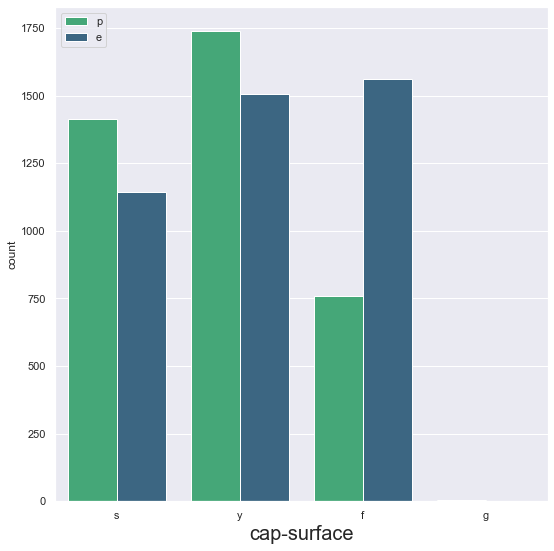

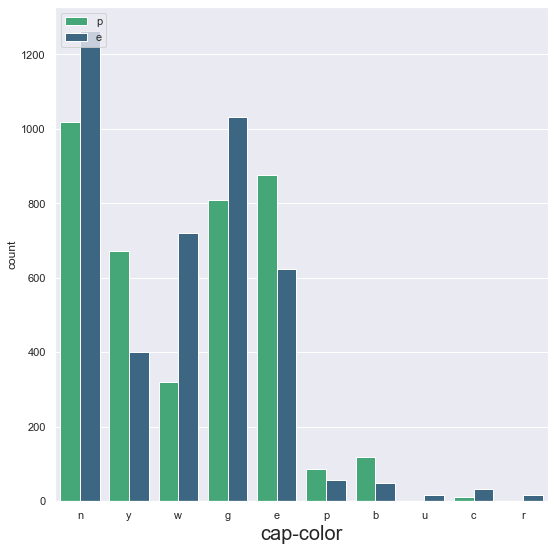

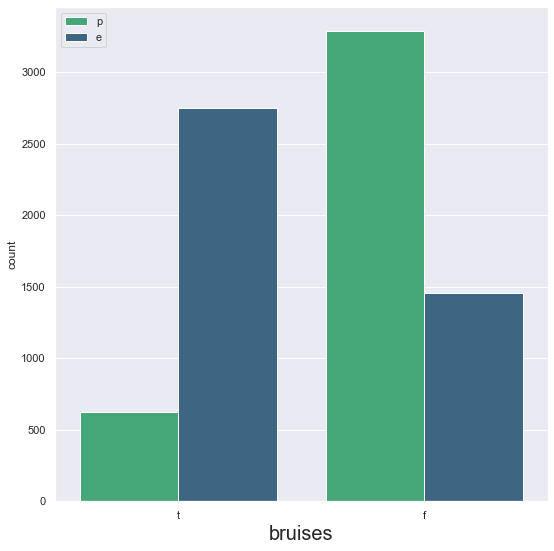

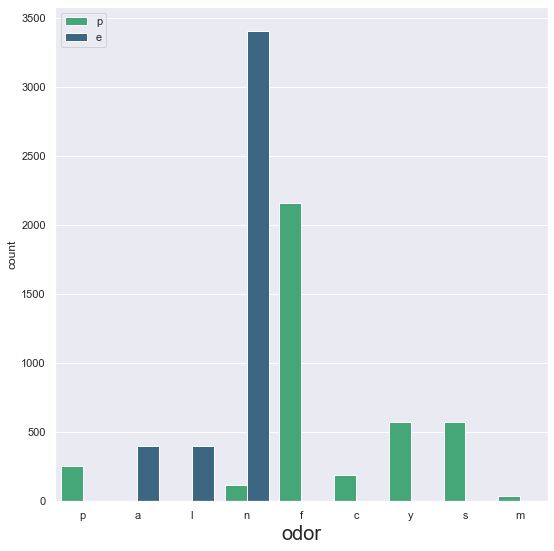

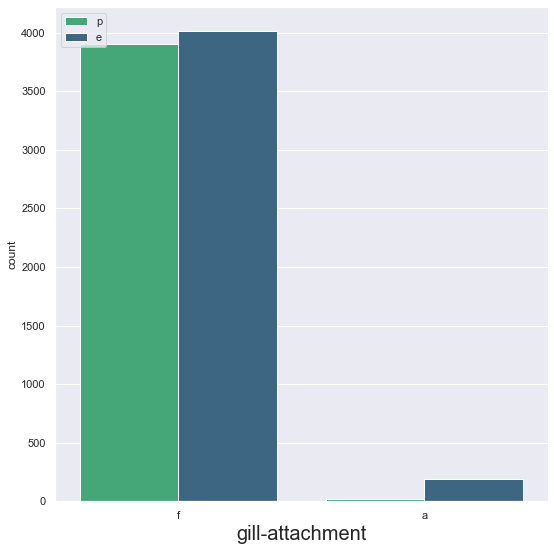

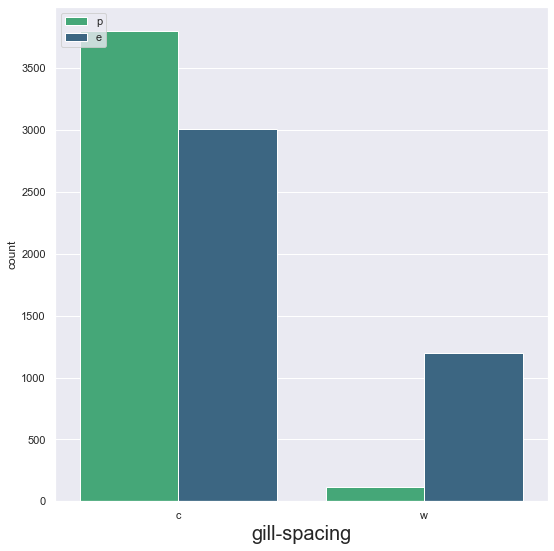

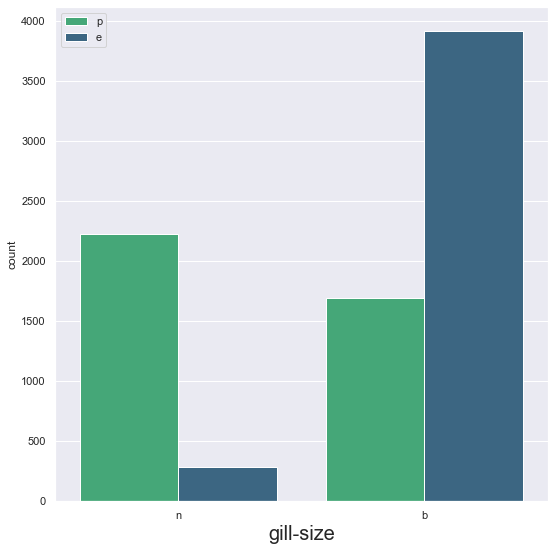

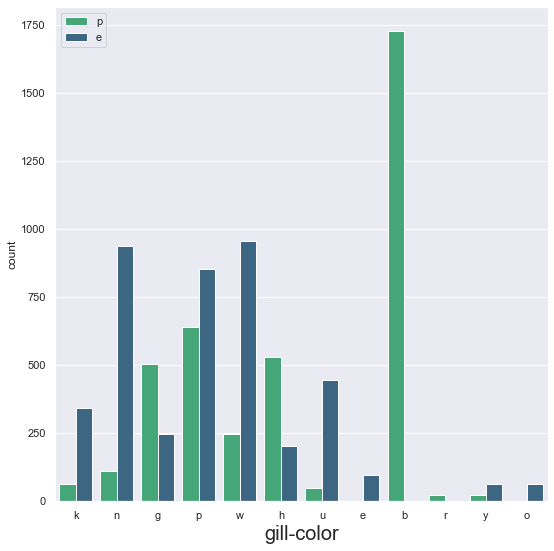

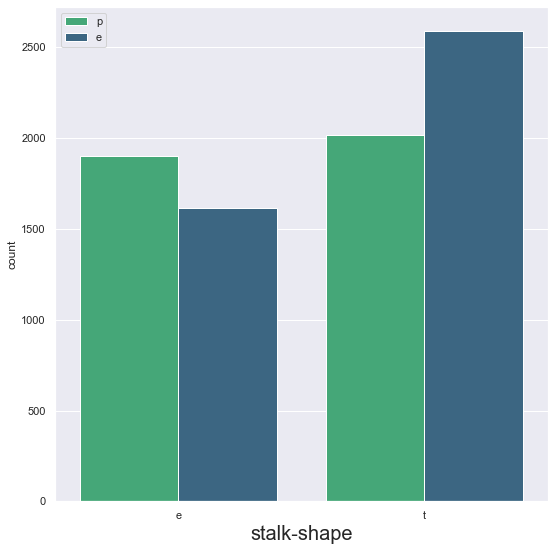

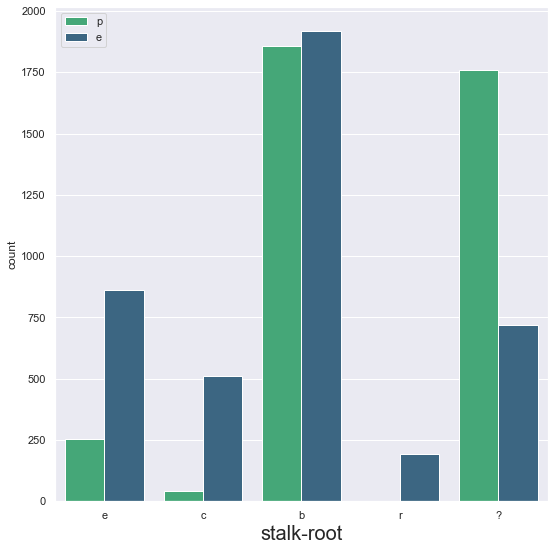

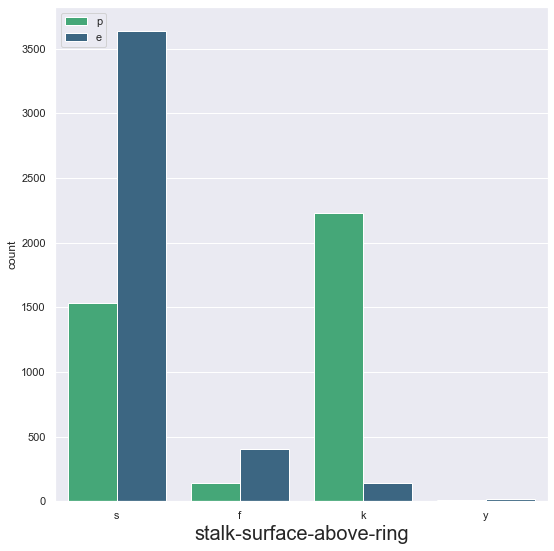

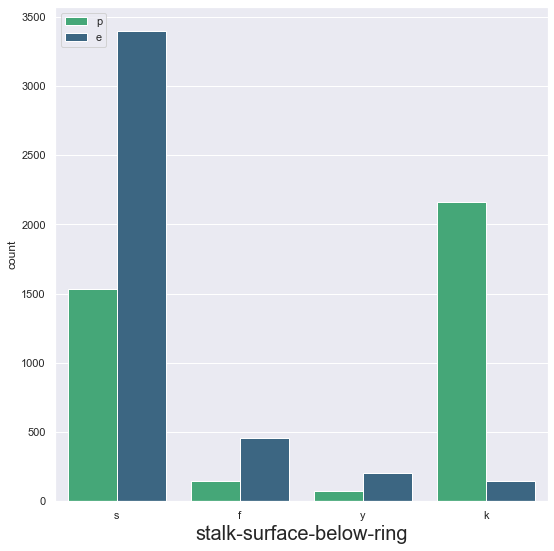

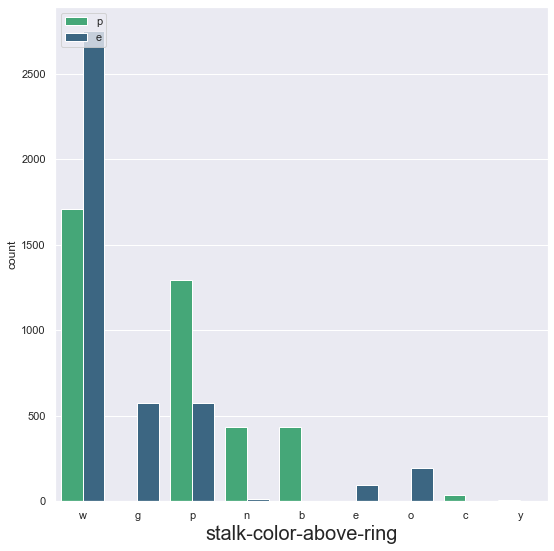

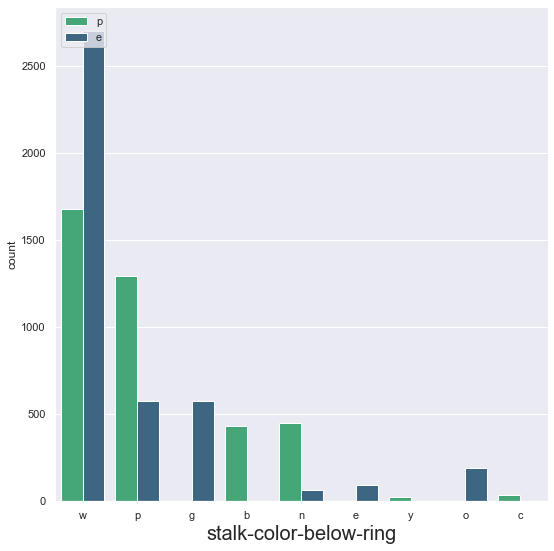

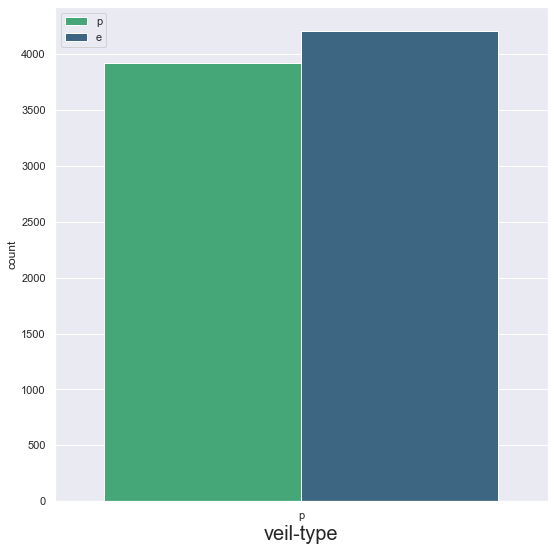

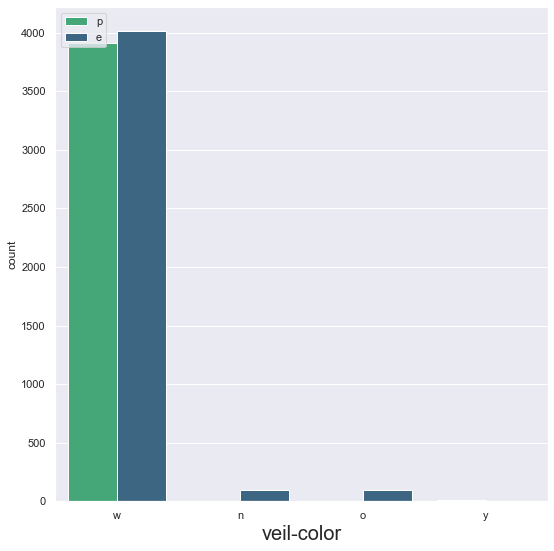

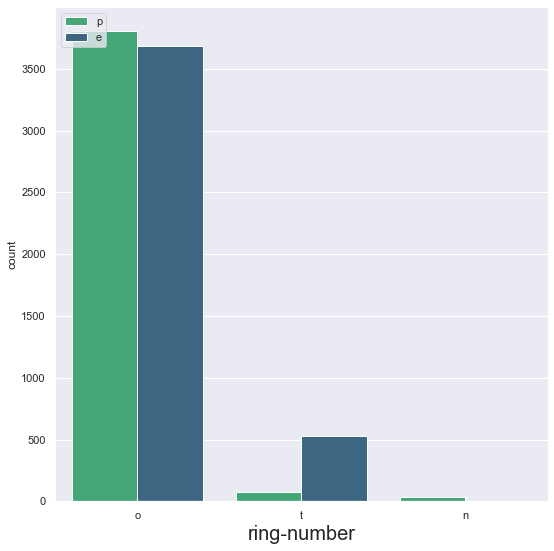

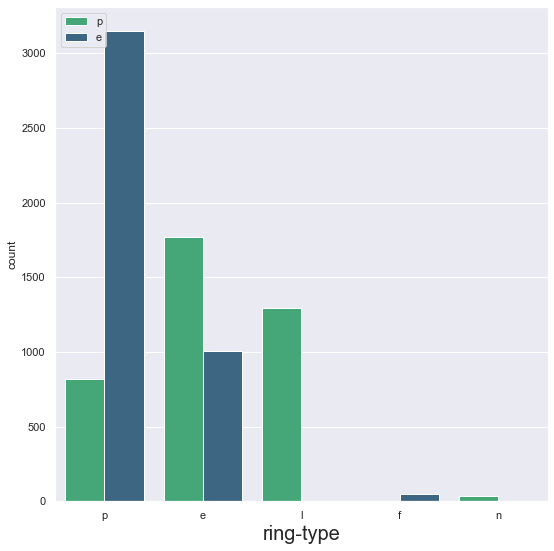

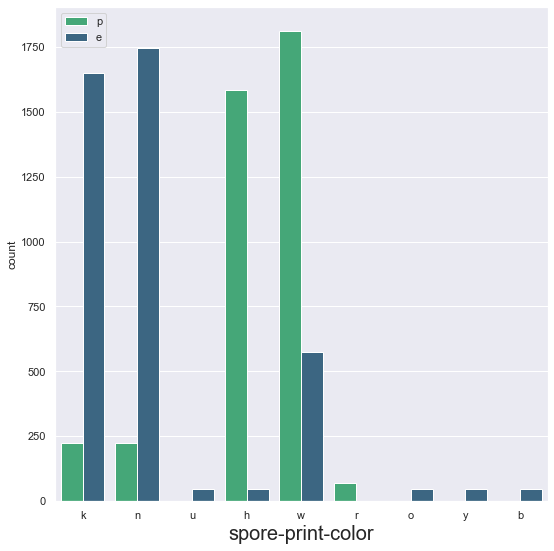

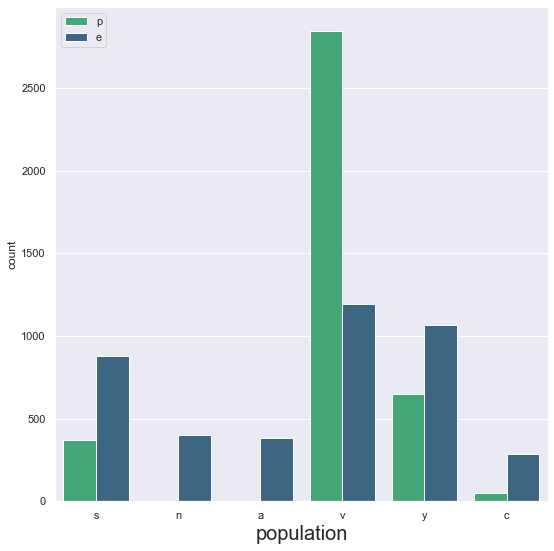

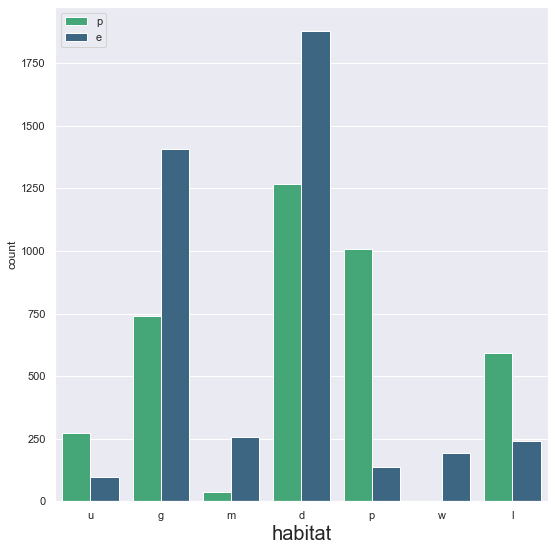

In [15]:
import warnings 
warnings.filterwarnings('ignore')
for col in M_cols[1:]: 
    plt.figure(figsize=(30,20))
    plt.subplot(2,3,1)
    sns.countplot(x=col ,hue='class', data=df ,palette='viridis_r')
    plt.xlabel(col, fontsize=20)
    plt.legend(loc='upper left')


In [16]:
[pd.pivot_table(df, index=[col,"class"], aggfunc = {col:np.count_nonzero}) for col in M_cols[1:]]

[                 cap-shape
 cap-shape class           
 b         e            404
           p             48
 c         p              4
 f         e           1596
           p           1556
 k         e            228
           p            600
 s         e             32
 x         e           1948
           p           1708,
                    cap-surface
 cap-surface class             
 f           e             1560
             p              760
 g           p                4
 s           e             1144
             p             1412
 y           e             1504
             p             1740,
                  cap-color
 cap-color class           
 b         e             48
           p            120
 c         e             32
           p             12
 e         e            624
           p            876
 g         e           1032
           p            808
 n         e           1264
           p           1020
 p         e             56
          

In [17]:
cols = df.columns
df[cols] = df[cols].apply(LabelEncoder().fit_transform)
df

class  cap-shape  cap-surface  cap-color  bruises  odor  \
0         1          5            2          4        1     6   
1         0          5            2          9        1     0   
2         0          0            2          8        1     3   
3         1          5            3          8        1     6   
4         0          5            2          3        0     5   
...     ...        ...          ...        ...      ...   ...   
8119      0          3            2          4        0     5   
8120      0          5            2          4        0     5   
8121      0          2            2          4        0     5   
8122      1          3            3          4        0     8   
8123      0          5            2          4        0     5   

      gill-attachment  gill-spacing  gill-size  gill-color  ...  \
0                   1             0          1           4  ...   
1                   1             0          0           4  ...   
2                   1             0          0           5  ...   
3                   1             0          1           5  ...   
4                   1             1          0           4  ...   
...               ...           ...        ...         ...  ...   
8119                0             0          0          11  ...   
8120                0             0          0          11  ...   
8121                0             0          0           5  ...   
8122                1             0          1           0  ...   
8123                0             0          0          11  ...   

      stalk-surface-below-ring  stalk-color-above-ring  \
0                            2                       7   
1                            2                       7   
2                            2                       7   
3                            2                       7   
4                            2                       7   
...                        ...                     ...   
8119                         2                       5   
8120                         2                       5   
8121                         2                       5   
8122                         1                       7   
8123                         2                       5   

      stalk-color-below-ring  veil-type  veil-color  ring-number  ring-type  \
0                          7          0           2            1          4   
1                          7          0           2            1          4   
2                          7          0           2            1          4   
3                          7          0           2            1          4   
4                          7          0           2            1          0   
...                      ...        ...         ...          ...        ...   
8119                       5          0           1            1          4   
8120                       5          0           0            1          4   
8121                       5          0           1            1          4   
8122                       7          0           2            1          0   
8123                       5          0           1            1          4   

      spore-print-color  population  habitat  
0                     2           3        5  
1                     3           2        1  
2                     3           2        3  
3                     2           3        5  
4                     3           0        1  
...                 ...         ...      ...  
8119                  0           1        2  
8120                  0           4        2  
8121                  0           1        2  
8122                  7           4        2  
8123                  4           1        2  

[8124 rows x 23 columns]

In [18]:
df.corr()

class  cap-shape  cap-surface  cap-color  \
class                     1.000000   0.052951     0.178446  -0.031384   
cap-shape                 0.052951   1.000000    -0.050454  -0.048203   
cap-surface               0.178446  -0.050454     1.000000  -0.019402   
cap-color                -0.031384  -0.048203    -0.019402   1.000000   
bruises                  -0.501530  -0.035374     0.070228  -0.000764   
odor                     -0.093552  -0.021935     0.045233  -0.387121   
gill-attachment           0.129200   0.078865    -0.034180   0.041436   
gill-spacing             -0.348387   0.013196    -0.282306   0.144259   
gill-size                 0.540024   0.054050     0.208100  -0.169464   
gill-color               -0.530566  -0.006039    -0.161017   0.084659   
stalk-shape              -0.102019   0.063794    -0.014123  -0.456496   
stalk-root               -0.379361   0.030191    -0.126245   0.321274   
stalk-surface-above-ring -0.334593  -0.030417     0.089090  -0.060837   
stalk-surface-below-ring -0.298801  -0.032591     0.107965  -0.047710   
stalk-color-above-ring   -0.154003  -0.031659     0.066050   0.002364   
stalk-color-below-ring   -0.146730  -0.030390     0.068885   0.008057   
veil-type                      NaN        NaN          NaN        NaN   
veil-color                0.145142   0.072560    -0.016603   0.036130   
ring-number              -0.214366  -0.106534    -0.026147  -0.005822   
ring-type                -0.411771  -0.025457    -0.106407   0.162513   
spore-print-color         0.171961  -0.073416     0.230364  -0.293523   
population                0.298686   0.063413     0.021555  -0.144770   
habitat                   0.217179  -0.042221     0.163887   0.033925   

                           bruises      odor  gill-attachment  gill-spacing  \
class                    -0.501530 -0.093552         0.129200     -0.348387   
cap-shape                -0.035374 -0.021935         0.078865      0.013196   
cap-surface               0.070228  0.045233        -0.034180     -0.282306   
cap-color                -0.000764 -0.387121         0.041436      0.144259   
bruises                   1.000000 -0.061825         0.137359     -0.299473   
odor                     -0.061825  1.000000        -0.059590      0.063936   
gill-attachment           0.137359 -0.059590         1.000000      0.071489   
gill-spacing             -0.299473  0.063936         0.071489      1.000000   
gill-size                -0.369596  0.310495         0.108984     -0.108333   
gill-color                0.527120 -0.129213        -0.128567      0.100193   
stalk-shape               0.099364  0.459766         0.186485      0.080895   
stalk-root                0.244188 -0.205215         0.144063      0.350548   
stalk-surface-above-ring  0.460824  0.118617        -0.088916     -0.212359   
stalk-surface-below-ring  0.458983  0.061820        -0.116177     -0.213775   
stalk-color-above-ring    0.083538  0.174532         0.099299      0.274574   
stalk-color-below-ring    0.092874  0.169407         0.097160      0.253505   
veil-type                      NaN       NaN              NaN           NaN   
veil-color                0.119770 -0.057747         0.897518      0.073363   
ring-number               0.056788  0.111905         0.093236      0.243014   
ring-type                 0.692973 -0.281387        -0.146689     -0.195897   
spore-print-color        -0.285008  0.469055        -0.029524      0.047323   
population                0.088137 -0.043623         0.165575     -0.529253   
habitat                  -0.075095 -0.026610        -0.030304     -0.154680   

                          gill-size  gill-color  ...  \
class                      0.540024   -0.530566  ...   
cap-shape                  0.054050   -0.006039  ...   
cap-surface                0.208100   -0.161017  ...   
cap-color                 -0.169464    0.084659  ...   
bruises                   -0.369596    0.527120  ...   
odor                       0.310495   -0.12

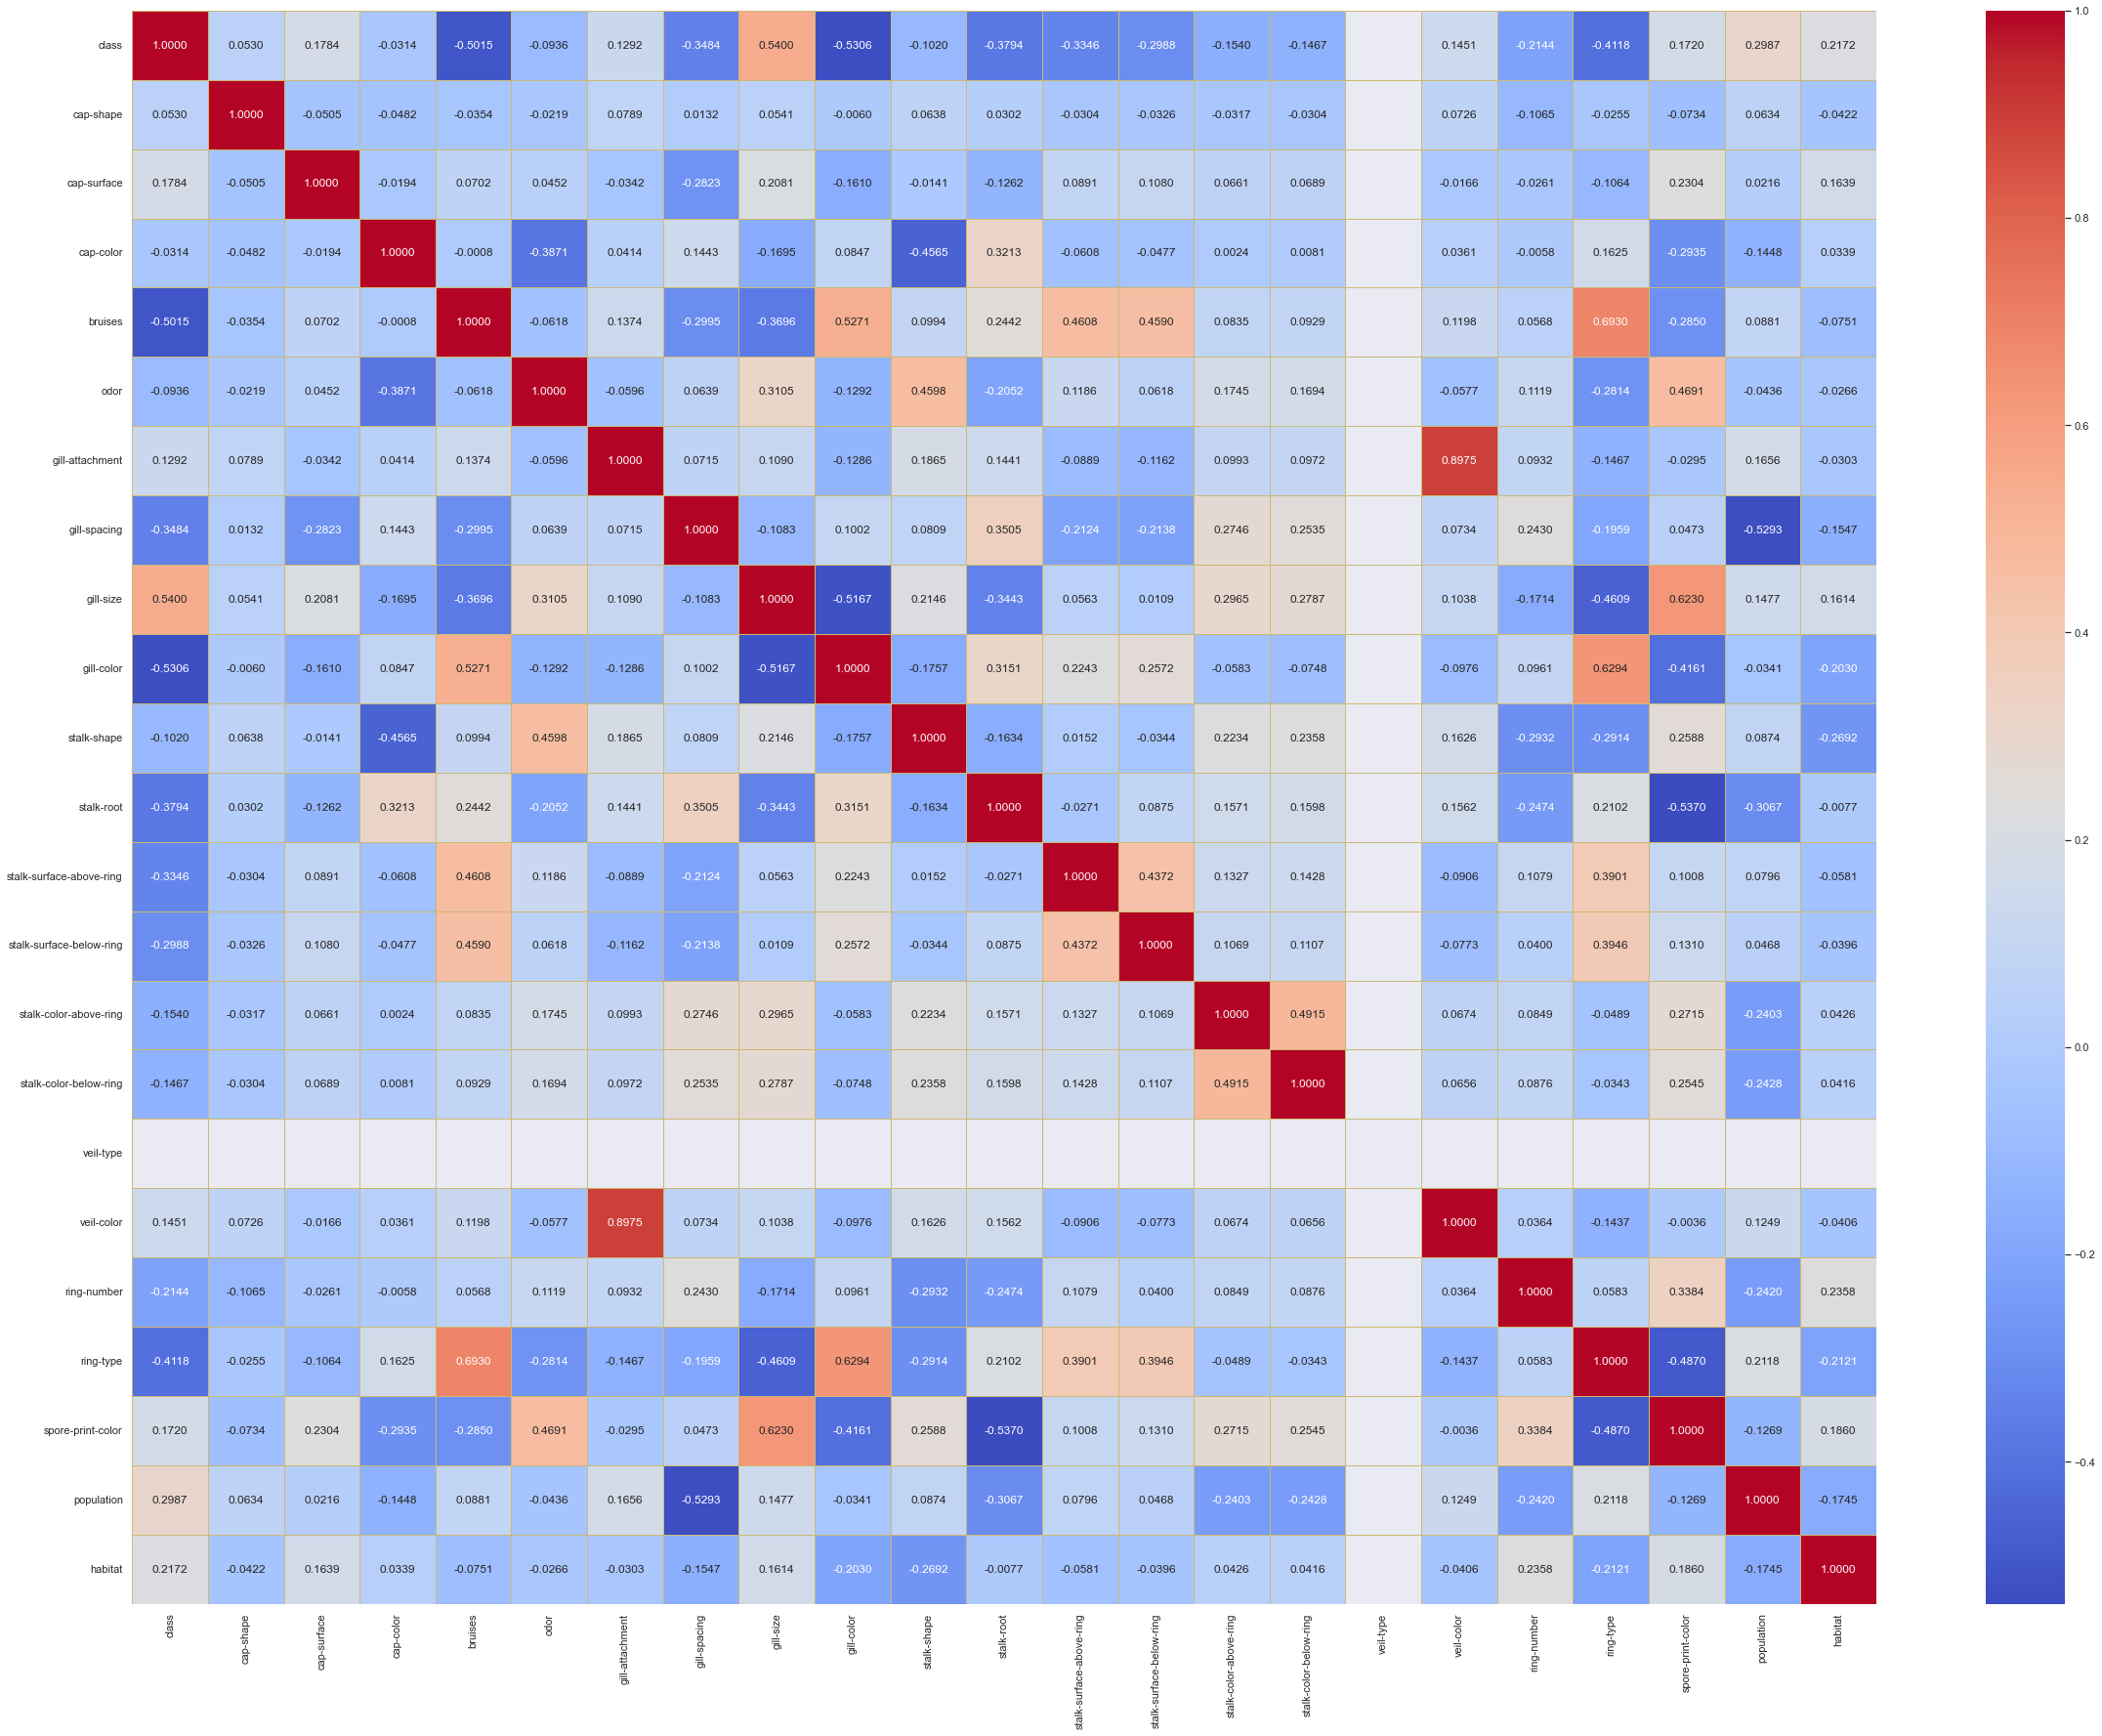

In [19]:
#correlation analsys for data
corr=df.corr()
fig, ax = plt.subplots(figsize=(40,30))
sns.heatmap(corr, cmap='coolwarm',linewidths= 1,linecolor="y",annot=True,fmt=".4f")
plt.show()

<AxesSubplot:>

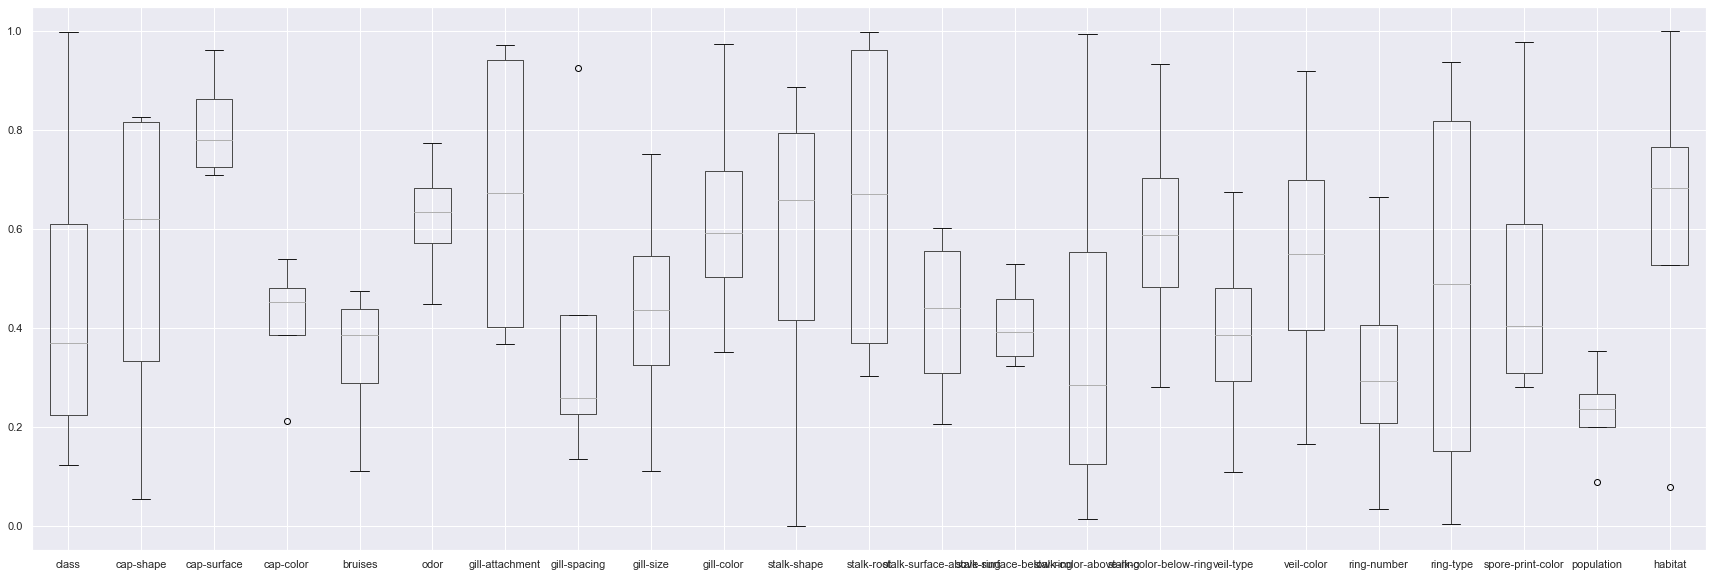

In [20]:
df1= pd.DataFrame(data=np.random.random(size=(4,23)), columns = df.columns[0:])
plt.figure(figsize=(30,10))
df1.boxplot()


In [21]:
!pip install sweetviz
!pip install pandas_profiling
import sweetviz as sv 
sweet_report = sv.analyze(df)
sweet_report.show_html('mushroom_report.html')   

                                             |                                             | [  0%]   00:00 ->…

Report mushroom_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [22]:
import pandas_profiling as pp
EDA_report= pp.ProfileReport(df)
EDA_report.to_file(output_file='report.html') 
EDA_report   

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [23]:
from sklearn.model_selection import train_test_split
y=df["class"].values
x=df.drop(["class"],axis=1).values
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42,test_size=0.2)
x_train, y_train
x_test, y_test

(array([[2, 0, 4, ..., 3, 3, 1],
        [2, 2, 2, ..., 7, 4, 2],
        [5, 3, 4, ..., 7, 4, 2],
        ...,
        [5, 3, 4, ..., 7, 4, 4],
        [3, 3, 4, ..., 7, 4, 4],
        [5, 0, 9, ..., 1, 5, 4]]),
 array([0, 1, 1, ..., 1, 1, 1]))

# LogisticRegression

In [24]:
from sklearn.linear_model import LogisticRegression

lg=LogisticRegression()
lg.fit(x_train,y_train)

LogisticRegression()

In [25]:
print("Test Accuracy: {}%".format(round(lg.score(x_train,y_train)*100,2)))

Test Accuracy: 95.31%


In [26]:
print("Test Accuracy: {}%".format(round(lg.score(x_test,y_test)*100,2)))

Test Accuracy: 94.71%


# Support vector machines


In [27]:
from sklearn import svm
from sklearn.svm import SVC

In [28]:
svm=SVC(random_state=42, gamma="auto")
svm.fit(x_train,y_train)

SVC(gamma='auto', random_state=42)

In [29]:
print("Test Accuracy: {}%".format(round(svm.score(x_train,y_train)*100,2)))

Test Accuracy: 100.0%


In [30]:
print("Test Accuracy: {}%".format(round(svm.score(x_test,y_test)*100,2)))

Test Accuracy: 100.0%


# decision tree

In [31]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train) 

DecisionTreeClassifier()

In [32]:
print("Test Accuracy: {}%".format(round(dtc.score(x_test, y_test)*100,2)))

Test Accuracy: 100.0%


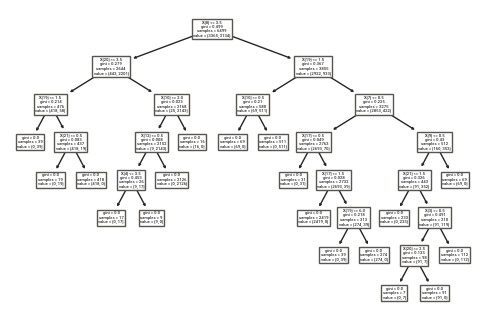

In [33]:
from sklearn.tree import plot_tree
from sklearn import tree
tree.plot_tree(dtc);

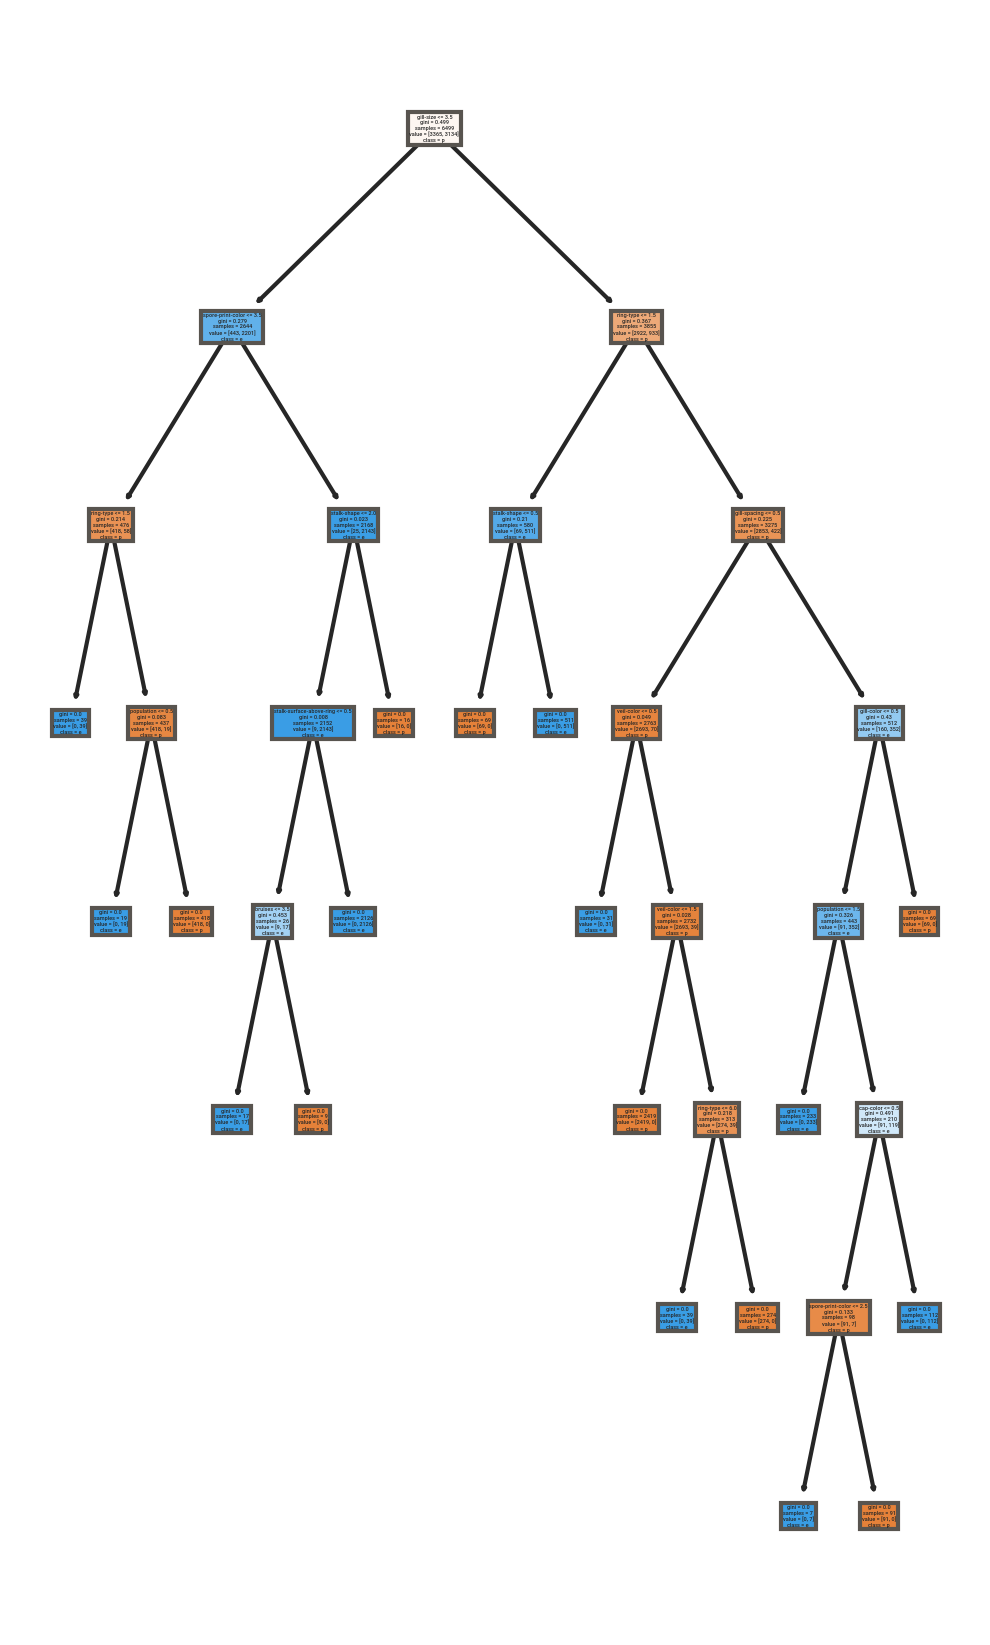

In [34]:
fn=['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor','gill-attachment', 'gill-spacing', 'gill-size', 'gill-color','stalk-shape', 'stalk-root', 'stalk-surface-above-ring','stalk-surface-below-ring', 'stalk-color-above-ring','stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number','ring-type', 'spore-print-color', 'population', 'habitat']
cn=['p', 'e']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,7), dpi=300)
tree.plot_tree(dtc,
               feature_names = fn, 
               class_names=cn,
               filled = True); 

# random forest

In [35]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()
RF.fit(x_train,y_train)

RandomForestRegressor()

In [36]:
print("Test accuracy: {}%".format(round(RF.score(x_train,y_train)*100,2)))

Test accuracy: 100.0%


# K nearest neighbour

In [37]:
from sklearn.neighbors import KNeighborsClassifier as KNC

bestk_value=0
bestk_score=0

for i in range(1,10):
    knn = KNC(n_neighbors=i)
    knn.fit(x_train, y_train)
    if knn.score(x_test, y_test)>bestk_score:
        bestk_score = knn.score(x_train, y_train)
        bestk_value = i


In [38]:
print("""Best knn value: {}
Test accuracy: {}%""".format(bestk_value,round(knn.score(x_test,y_test)*100,2)))

Best knn value: 1
Test accuracy: 99.51%


# Naive bayes

In [39]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [40]:
print("Test accuracy: {}%".format(round(nb.score(x_test,y_test)*100,2)))

Test accuracy: 92.18%


In [41]:
print("Test accuracy: {}%".format(round(nb.score(x_train,y_train)*100,2)))

Test accuracy: 92.35%


In [42]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

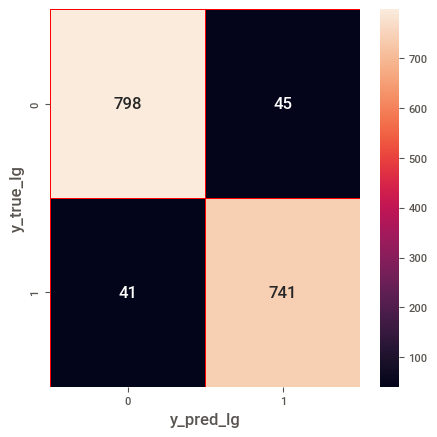

In [45]:
y_pred_lg = lg.predict(x_test)
y_true_lg = y_test
cm = confusion_matrix(y_true_lg, y_pred_lg)
f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm, annot=True, linewidths=0.5, linecolor="red", fmt = ".0f", ax = ax)
plt.xlabel("y_pred_lg")
plt.ylabel("y_true_lg")
plt.show()

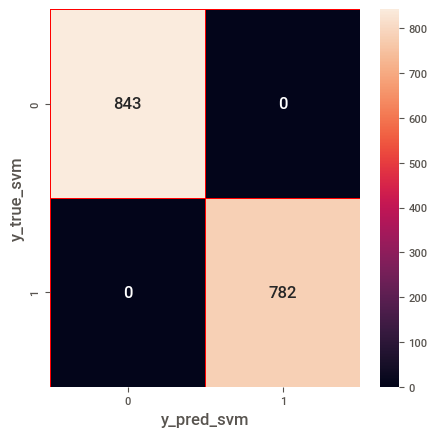

In [46]:
y_pred_svm = svm.predict(x_test)
y_true_svm = y_test
cm = confusion_matrix(y_pred_svm, y_true_svm)
f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm, annot=True, linewidths=0.5, linecolor="red", fmt = ".0f", ax = ax)
plt.xlabel("y_pred_svm")
plt.ylabel("y_true_svm")
plt.show()

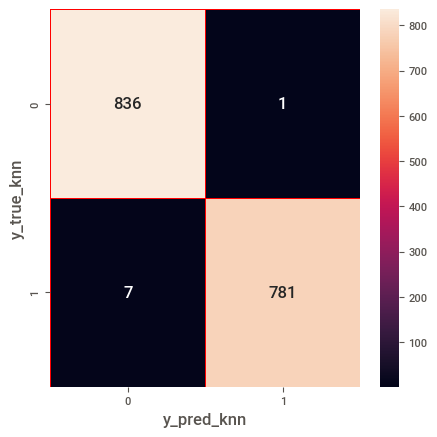

In [47]:
y_pred_knn = knn.predict(x_test)
y_true_knn = y_test
cm = confusion_matrix(y_pred_knn, y_true_knn)
f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm, annot=True, linewidths=0.5, linecolor="red", fmt = ".0f", ax = ax)
plt.xlabel("y_pred_knn")
plt.ylabel("y_true_knn")
plt.show()

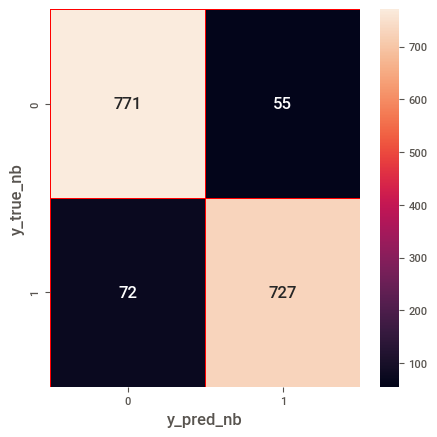

In [48]:
y_pred_nb = nb.predict(x_test)
y_true_nb = y_test
cm = confusion_matrix(y_pred_nb, y_true_nb)
f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm, annot=True, linewidths=0.5, linecolor="red", fmt = ".0f", ax = ax)
plt.xlabel("y_pred_nb")
plt.ylabel("y_true_nb")
plt.show()

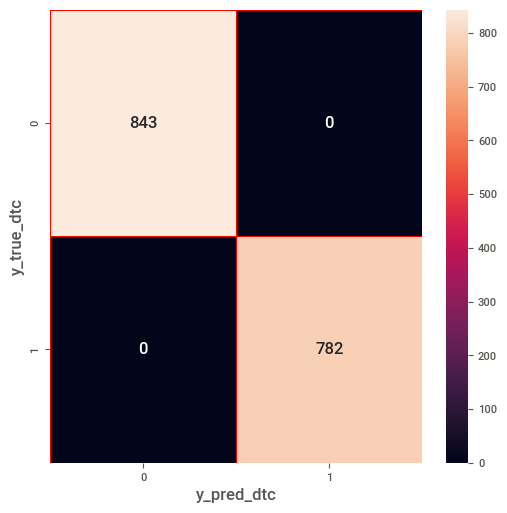

In [50]:
y_pred_dtc = dtc.predict(x_test)
y_true_dtc = y_test
cm = confusion_matrix(y_pred_dtc, y_true_dtc)
f, ax = plt.subplots(figsize = (6,6))
sns.heatmap(cm, annot=True, linewidths=0.5, linecolor="red", fmt = ".0f", ax = ax)
plt.xlabel("y_pred_dtc")
plt.ylabel("y_true_dtc")
plt.show()

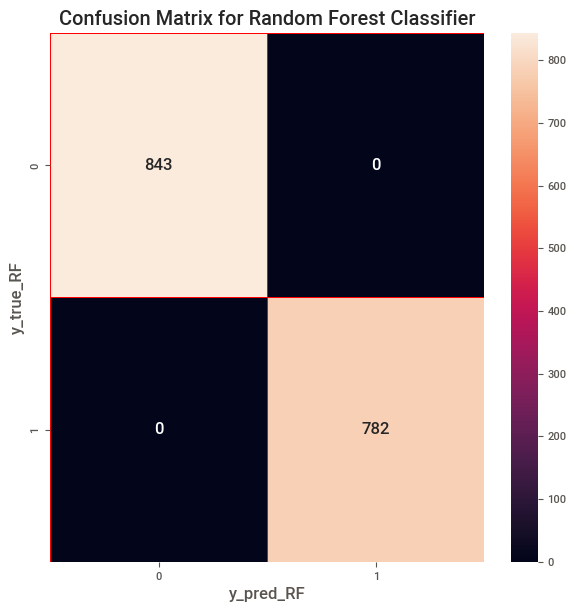

In [61]:
y_pred_RF = RF.predict(x_test)
y_true_RF = y_test

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot=True, linewidths=0.5, linecolor="red", fmt = ".0f", ax = ax)
plt.xlabel("y_pred_RF")
plt.ylabel("y_true_RF")
plt.title('Confusion Matrix for Random Forest Classifier');
#plt.savefig("rfcm.png", format='png', dpi=900, bbox_inches='tight')
plt.show()


In [60]:
preds = dtc.predict(x_test)

print(preds[:36])
print(y_test[:36])

# 0 - Edible
# 1 - Poisonous

[0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 1]
[0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 1]
